In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading data set
data=pd.read_excel("iris.xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#checking the shape of given data set
data.shape

(150, 5)

In [4]:
#Checking the counts in classification
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [5]:
#Getting the information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


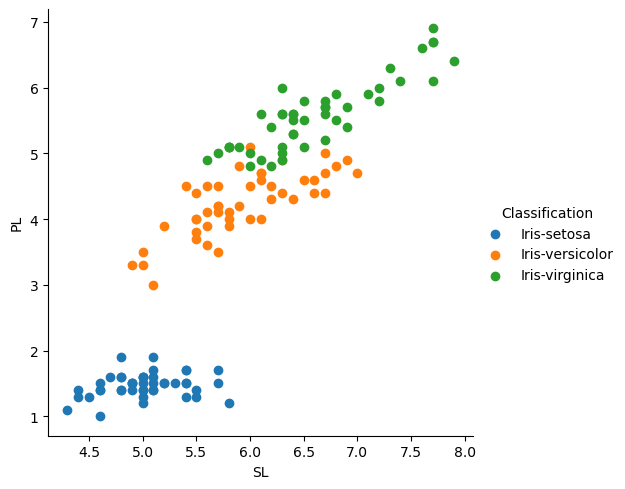

In [6]:
#Visualising the data
sns.FacetGrid(data,hue="Classification",height=5).map(plt.scatter,"SL","PL").add_legend()

In [7]:
#Checking the descriptive Statistics
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#Checking missing values
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
#Filling the missing values with zero
data = data.fillna(value = 0)
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,0.0,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,0.0,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,0.0,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
#splitting input and output columns
y=data['Classification']
x=data.drop(['Classification'],axis=1)

## Data Normalisation

In [12]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(data)
X[0:4]

array([[-0.32728621,  0.78377446, -1.17928622, -1.31297673, -1.22474487],
       [-0.46290204,  0.0994545 , -1.17928622, -1.31297673, -1.22474487],
       [-3.78548993,  0.37318248, -1.23274434, -1.31297673, -1.22474487],
       [-0.66632579,  0.23631849, -1.12582809, -1.31297673, -1.22474487]])

## Testing and Traning

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
model=clf.fit(x_train,y_train)

In [15]:
y_pred=model.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('classification_report = ',classification_report(y_test,y_pred))

Accuracy =  0.9736842105263158
classification_report =                precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



## Data Normalisation

In [17]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(data)
X[0:4]

array([[-0.32728621,  0.78377446, -1.17928622, -1.31297673, -1.22474487],
       [-0.46290204,  0.0994545 , -1.17928622, -1.31297673, -1.22474487],
       [-3.78548993,  0.37318248, -1.23274434, -1.31297673, -1.22474487],
       [-0.66632579,  0.23631849, -1.12582809, -1.31297673, -1.22474487]])

In [18]:
#Splitting the data into Traning and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## Knn Classification

In [19]:
from sklearn.neighbors import KNeighborsClassifier
Knnmodel=KNeighborsClassifier(n_neighbors=3)
Knnmodel.fit(x_train,y_train)
y_predict1=Knnmodel.predict(x_test)

C:\Users\suluv\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
#finging Accuracy score and Confusion Matrix
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(y_test,y_predict1))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values,y_predict1)
cm

accuracy =  0.9210526315789473


array([[15,  0,  0],
       [ 1,  9,  1],
       [ 1,  0, 11]], dtype=int64)

## SVM

#LINEAR

In [22]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svmclf.fit(x_train,y_train)
y_pred_svm = svmclf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy = ',accuracy_score(y_test,y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))

accuracy =  0.9736842105263158
[[15  0  0]
 [ 1 10  0]
 [ 0  0 12]]


#RBF

In [23]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'rbf')
svmclf.fit(x_train,y_train)
y_pred_svm = svmclf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy = ',accuracy_score(y_test,y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))

accuracy =  0.9473684210526315
[[15  0  0]
 [ 1  9  1]
 [ 0  0 12]]


#POLY

In [24]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'poly')
svmclf.fit(x_train,y_train)
y_pred_svm = svmclf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy = ',accuracy_score(y_test,y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))

accuracy =  0.9736842105263158
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


## Desicion Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred_dt = dt_clf.predict(x_test)
print('accuracy = ',accuracy_score(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))

accuracy =  1.0
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)
y_pred_rf = rf_clf.predict(x_test)
print('accuracy = ',accuracy_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

accuracy =  1.0
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


#From the above classifications we can conclude that Desicion Tree and Random Forest method gets better Accuracy than others.